<a href="https://colab.research.google.com/github/marykoloful/IIAS_lab_Varkentin_IIBA/blob/master/lab1_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ИИБАмд-11 Варкентин Мария. Лабораторная работа по ИИАС №1.
1. Руководитель: Гуськов Г.Ю.
Примерная тема магистерской: Обнаружение депрессии из текстов пользователей в социальных сетях.
2. Несколько задач для решения в рамках дисциплины:
* Изучить pandas и numpy;
* Изучить методы обработки есстественного языка: токенизация, стемминг, word augmentation и др.
3. Датасет с названием "Student Depression Dataset" найден на Kaggle: https://www.kaggle.com/code/arifmia/student-depression-dataset-analysis-hybrid-model/notebook
4. Выполнить следующие операции по работе с данными:
* загрузка и сохранение данных;

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import kagglehub
# Download latest version
path = kagglehub.dataset_download("hopesb/student-depression-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + '/Student Depression Dataset.csv', index_col='id')
df.to_csv("Student Depression Dataset.csv")
df

100%|██████████| 454k/454k [00:00<00:00, 68.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hopesb/student-depression-dataset/versions/1


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,
2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0


* получение сведений о данных;

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27901 entries, 2 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  Degree

* Вывод отдельных строки и столбцов из таблицы

In [ ]:
# столбец Age
print(df["Age"])
# столбец Depression
print(df["Depression"])
# первые 3 строки датафрейма
print(df.head(3))
# строка 100 столбцы Age, Gender, Depression
print(df.loc[100, ["Age", "Gender", "Depression"]])

id
2         33.0
8         24.0
26        31.0
30        28.0
32        25.0
          ... 
140685    27.0
140686    27.0
140689    31.0
140690    18.0
140699    27.0
Name: Age, Length: 27901, dtype: float64
id
2         1
8         0
26        0
30        1
32        0
         ..
140685    0
140686    0
140689    0
140690    1
140699    1
Name: Depression, Length: 27901, dtype: int64
    Gender   Age           City Profession  Academic Pressure  Work Pressure  \
id                                                                             
2     Male  33.0  Visakhapatnam    Student                5.0            0.0   
8   Female  24.0      Bangalore    Student                2.0            0.0   
26    Male  31.0       Srinagar    Student                3.0            0.0   

    CGPA  Study Satisfaction  Job Satisfaction     Sleep Duration  \
id                                                                  
2   8.97                 2.0               0.0          5-6 hours   
8 

* группировка и агрегация данных в таблице;

In [ ]:
# смотрим уникальные значения столбца "Sleep Duration"
sleep_values = df["Sleep Duration"].unique()
print(sleep_values)

# считаем количество строк, соответсвующих каждому значению "Sleep Duration"
sleep_total = 0
for sleep_value in sleep_values:
    count = df[df["Sleep Duration"] == sleep_value].shape[0]
    sleep_total += count
    print(sleep_value, "count =", count)
# считаем сколько всего строк содержат значения в столбце "Sleep Duration"
print("Total count =", sleep_total)

# группируем строки по значениям столбцов "Have you ever had suicidal thoughts ?"
# и "Depression" и считаем количество
print(df.groupby(["Have you ever had suicidal thoughts ?", "Depression"]).size().reset_index(name="Count"))
# группируем строки по значениям столбцов "Family History of Mental Illness"
# и "Depression" и считаем количество
print(df.groupby(["Family History of Mental Illness", "Depression"]).size().reset_index(name="Count"))


['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
5-6 hours count = 6183
Less than 5 hours count = 8310
7-8 hours count = 7346
More than 8 hours count = 6044
Others count = 18
Total count = 27901
  Have you ever had suicidal thoughts ?  Depression  Count
0                                    No           0   7866
1                                    No           1   2379
2                                   Yes           0   3699
3                                   Yes           1  13957
  Family History of Mental Illness  Depression  Count
0                               No           0   6335
1                               No           1   8063
2                              Yes           0   5230
3                              Yes           1   8273


* сортировка данных в таблице;

In [ ]:
# сортируем датафрейм по возрасту (только столбцы "Gender", "Age", "Depression")
sorted_df = df[["Gender", "Age", "Financial Stress", "Depression"]].sort_values(by="Age")
# выводим первые 5 строк
print(sorted_df.head())
# и последние 5 строк отсортированного датафрейма
print(sorted_df.tail())

        Gender   Age  Financial Stress  Depression
id                                                
45903     Male  18.0               1.0           0
49784   Female  18.0               1.0           1
137980  Female  18.0               4.0           1
26400     Male  18.0               4.0           1
26392     Male  18.0               2.0           1
       Gender   Age  Financial Stress  Depression
id                                               
22004  Female  51.0               5.0           0
68441    Male  54.0               3.0           0
74887  Female  56.0               5.0           0
14768  Female  58.0               4.0           0
46602    Male  59.0               4.0           0


* удаление строк/столбцов;

In [ ]:
# удаляем столбец "Gender"
print(sorted_df.drop("Gender",axis=1).head())
# удаляем все записи (строки) о 18-летних
print(sorted_df.drop(sorted_df[sorted_df["Age"] == 18].index, axis=0).head())

         Age  Financial Stress  Depression
id                                        
45903   18.0               1.0           0
49784   18.0               1.0           1
137980  18.0               4.0           1
26400   18.0               4.0           1
26392   18.0               2.0           1
        Gender   Age  Financial Stress  Depression
id                                                
14795     Male  19.0               5.0           1
130088    Male  19.0               2.0           0
134182  Female  19.0               5.0           1
129639    Male  19.0               3.0           0
23262     Male  19.0               1.0           1


* удаление строк с пустыми значениями;

In [ ]:
data = sorted_df.copy()

# Добавляем строку с пустым значением Age. Способ №1
new_row = pd.DataFrame({"Gender" : ["Male"], "Depression" : ["Yes"]})
data = pd.concat([data, new_row], ignore_index=True)
# Добавляем строку с пустым значением. Способ №2
data.loc[len(data)] = ["Female", np.nan, np.nan, "No"]

print(data)
data.sort_values(by="Financial Stress", inplace=True)
print(data.tail())
# удаление строк с пустыми значениями Age
data.dropna(subset=["Age"], inplace=True)
print(data.tail())
# удаление строк с пустыми значениями Financial Stress
#data.dropna(subset=["Financial Stress"], inplace=True)
#print(data.tail())

       Gender   Age  Financial Stress Depression
0        Male  18.0               1.0          0
1      Female  18.0               1.0          1
2      Female  18.0               4.0          1
3        Male  18.0               4.0          1
4        Male  18.0               2.0          1
...       ...   ...               ...        ...
27898  Female  56.0               5.0          0
27899  Female  58.0               4.0          0
27900    Male  59.0               4.0          0
27901    Male   NaN               NaN        Yes
27902  Female   NaN               NaN         No

[27903 rows x 4 columns]
       Gender   Age  Financial Stress Depression
4830   Female  20.0               NaN          0
20206    Male  29.0               NaN          0
23658  Female  32.0               NaN          1
27901    Male   NaN               NaN        Yes
27902  Female   NaN               NaN         No
       Gender   Age  Financial Stress Depression
22965    Male  31.0               5.0      

* заполнение пустых значений на основе существующих данных.

In [ ]:
# добавление строки с пустым значением Age
data.loc[len(data)] = ["Male", np.nan, np.nan, "Yes"]
data.tail()
# заполнение пустых значений на основе предыдущих
data = data.ffill()
data.tail()
#data = data.drop(axis=0, index=len(data)-1)

,Gender,Age,Financial Stress,Depression
6324,Female,21.0,5.0,1
4830,Female,20.0,5.0,0
20206,Male,29.0,5.0,0
23658,Female,32.0,5.0,1
27901,Male,32.0,5.0,Yes


5. Разобраться с основными возможностями для визуализации данных:

* линейная диаграмма (plot);

<Axes: xlabel='Work/Study Hours'>

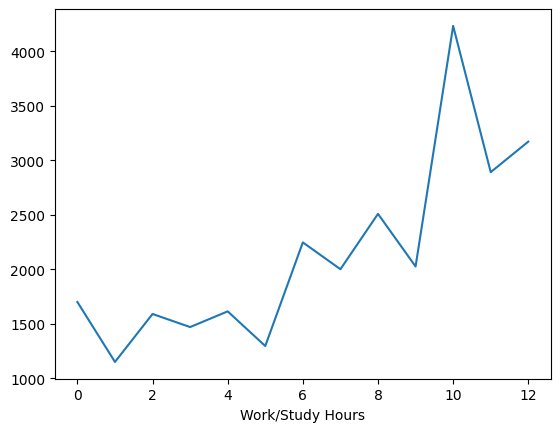

In [ ]:
plot_data = df[["Age", "Gender", "Work/Study Hours", "Financial Stress", "Depression"]].copy()
plot_data.groupby(["Work/Study Hours"]).size().plot.line()

* гистограмма (hist);

array([<Axes: title={'center': 'Female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Male'}, ylabel='Frequency'>], dtype=object)

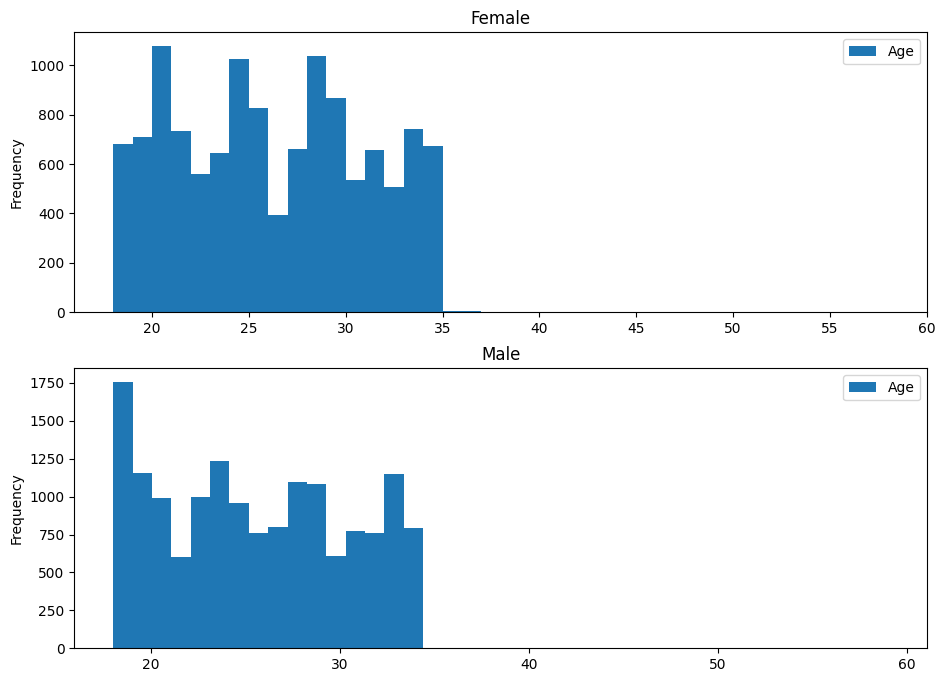

In [ ]:
# строим гистограмму
plot_data.plot.hist(column='Age', by="Gender", bins=40, figsize=(11, 8))

* столбчатая диаграмма (bar);

<Axes: xlabel='Gender'>

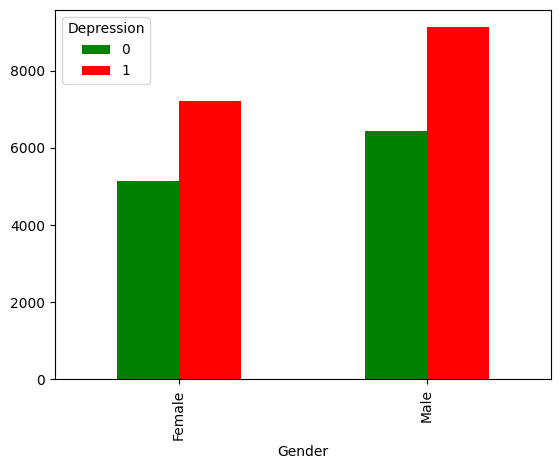

In [ ]:
plot_data.groupby(["Gender", "Depression"]).size().unstack().plot.bar(color=["green", "red"])

* ящик с усами (box);

<Axes: title={'center': 'Financial Stress'}, xlabel='Depression'>

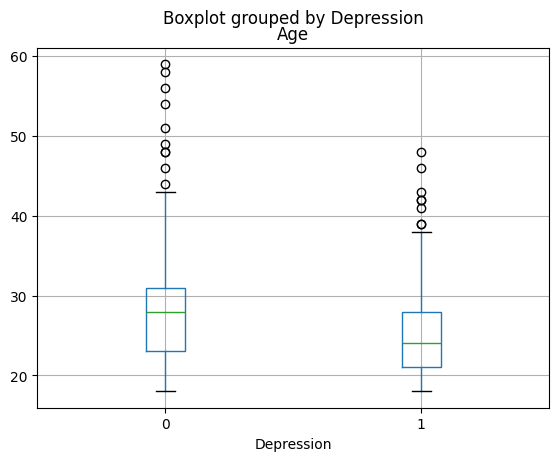

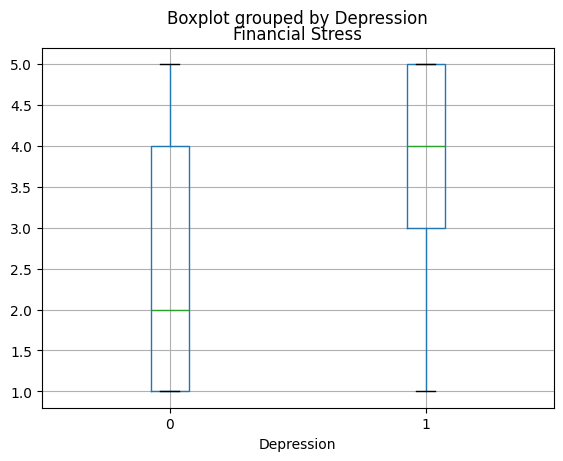

In [ ]:
plot_data.boxplot(column="Age", by="Depression")
plot_data.boxplot(column="Financial Stress", by="Depression")

* диаграмма рассеяния (scatter).

<Axes: xlabel='Age', ylabel='Work/Study Hours'>

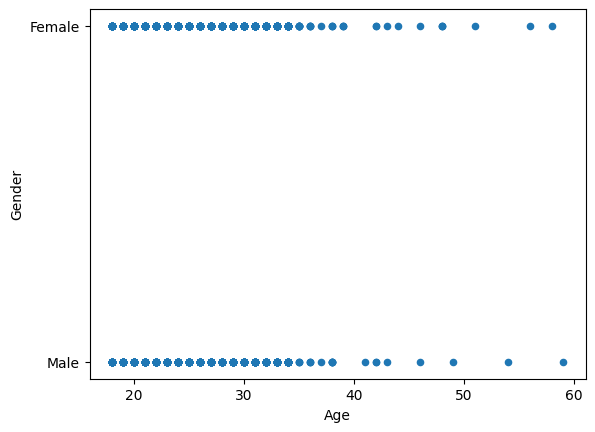

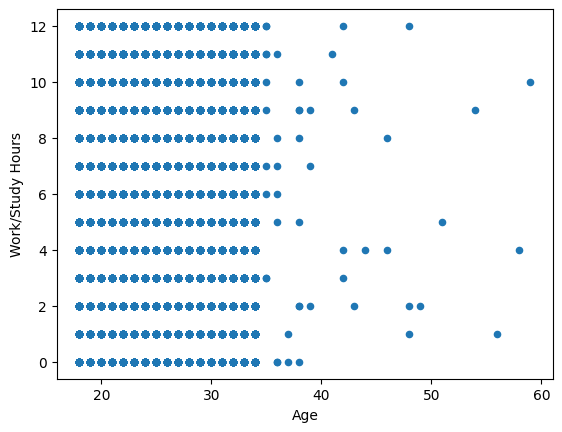

In [ ]:
plot_data.plot.scatter(x="Age", y="Gender")
plot_data.plot.scatter(x="Age", y="Work/Study Hours")